In [1]:
from IPython.display import display, Image
import cv2
import numpy as np

In [2]:
image = cv2.imread('road1.png')
h, w, c = image.shape

### Предобработка изображения

In [3]:
def save_and_show_image(image, filename):
    cv2.imwrite(filename, image)
    display(Image(filename))

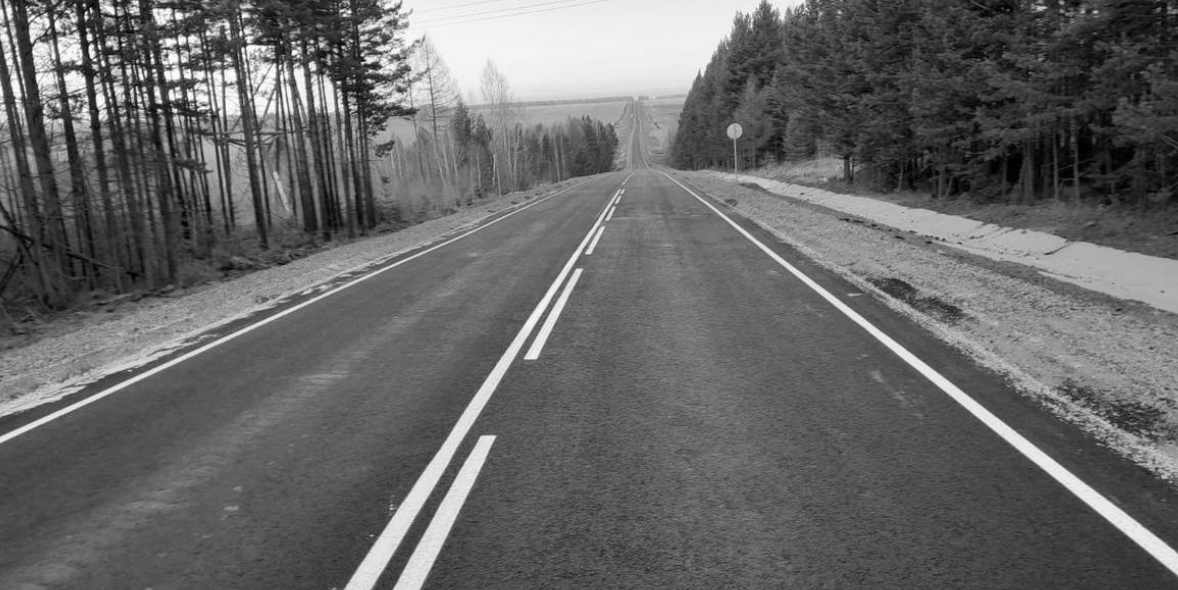

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
save_and_show_image(gray_image, 'grey_image.png')

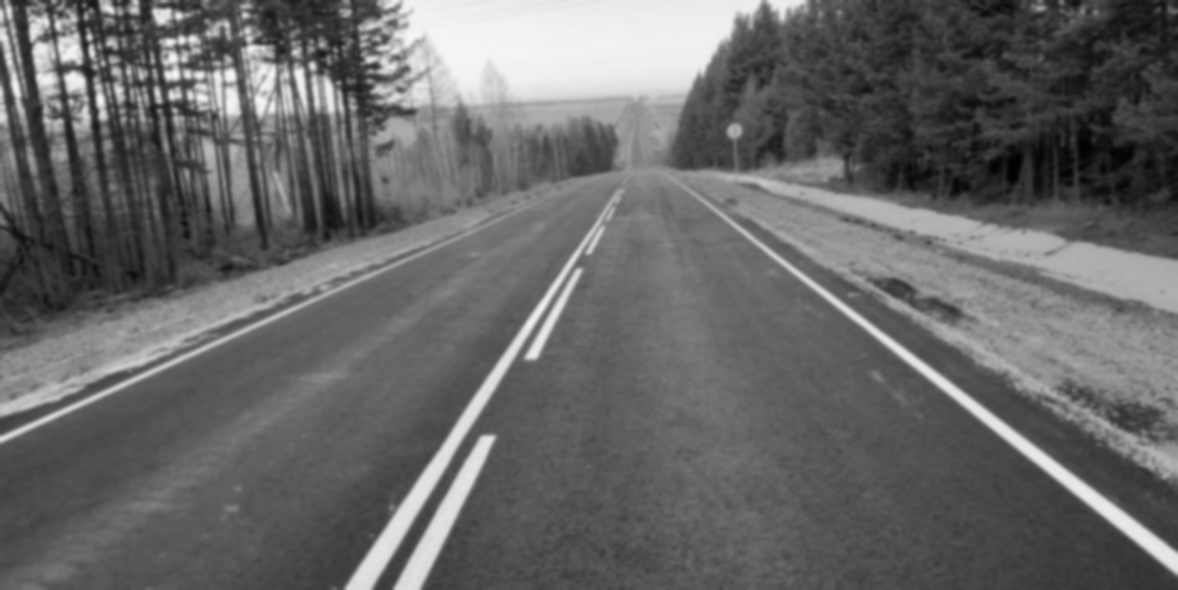

In [5]:
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 0)
save_and_show_image(blurred_image, 'blurred_image.png')

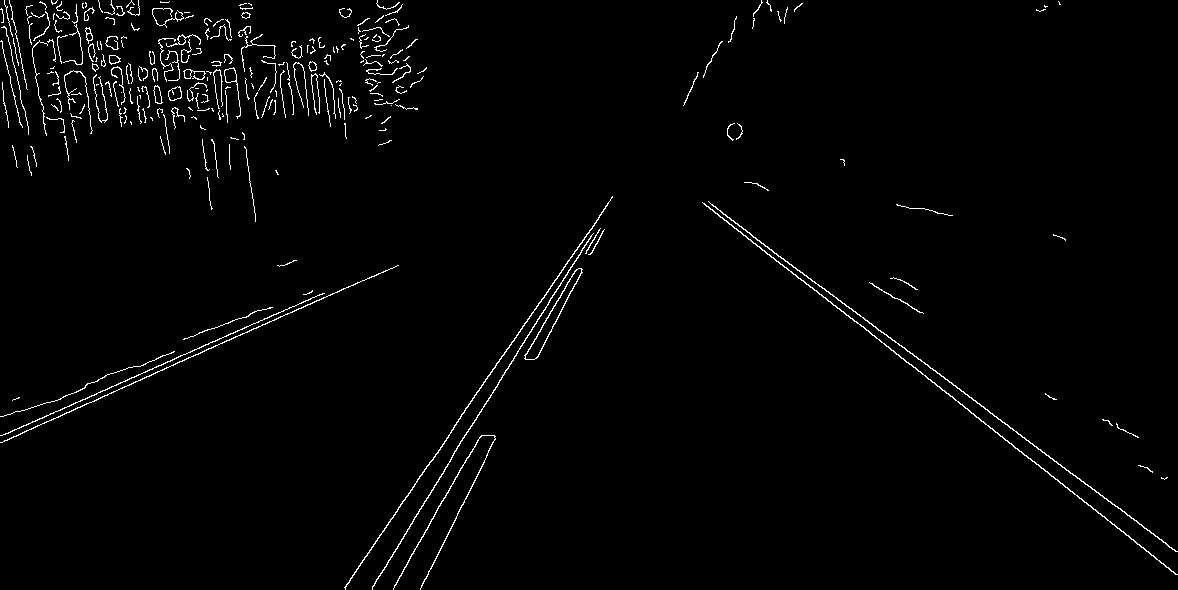

In [6]:
edges = cv2.Canny(blurred_image, 150, 200, apertureSize=3)
save_and_show_image(edges, 'canny_image.png')

### Преобразование Хафа 
Применяем преобразование Хафа для поиска линий.

In [7]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

Так как отрезков много, оставим только пару по краям дороги.

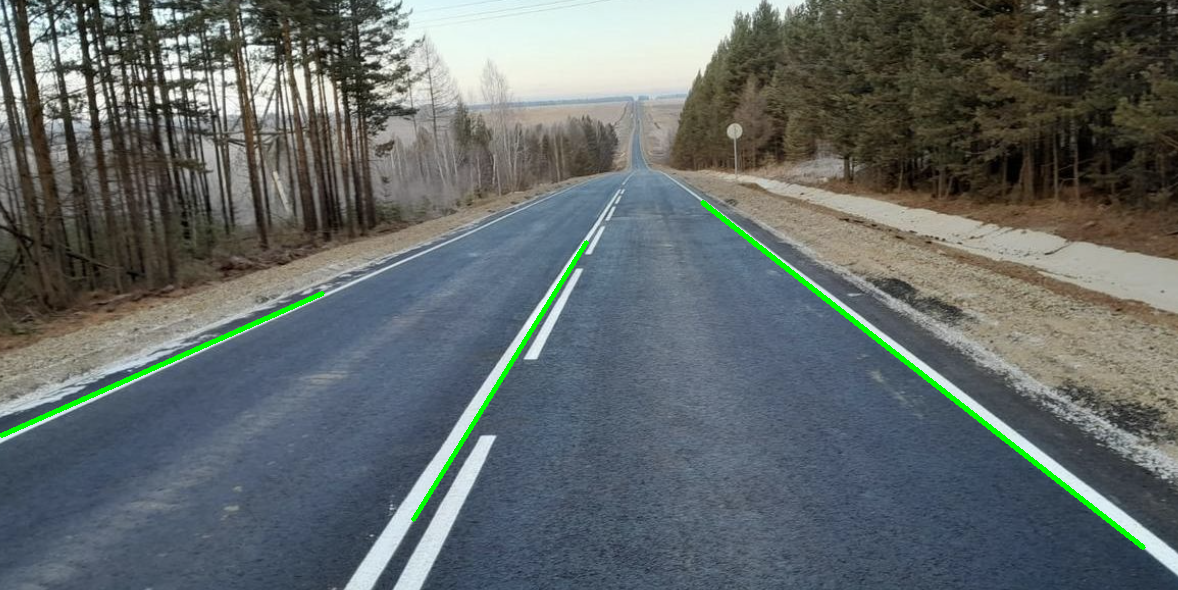

In [8]:
lines = [line for i, line in enumerate(lines) if i in (0, 1, 3)]

#Визуализируем линии
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
save_and_show_image(image, 'lines_image.png')

### Точка схода

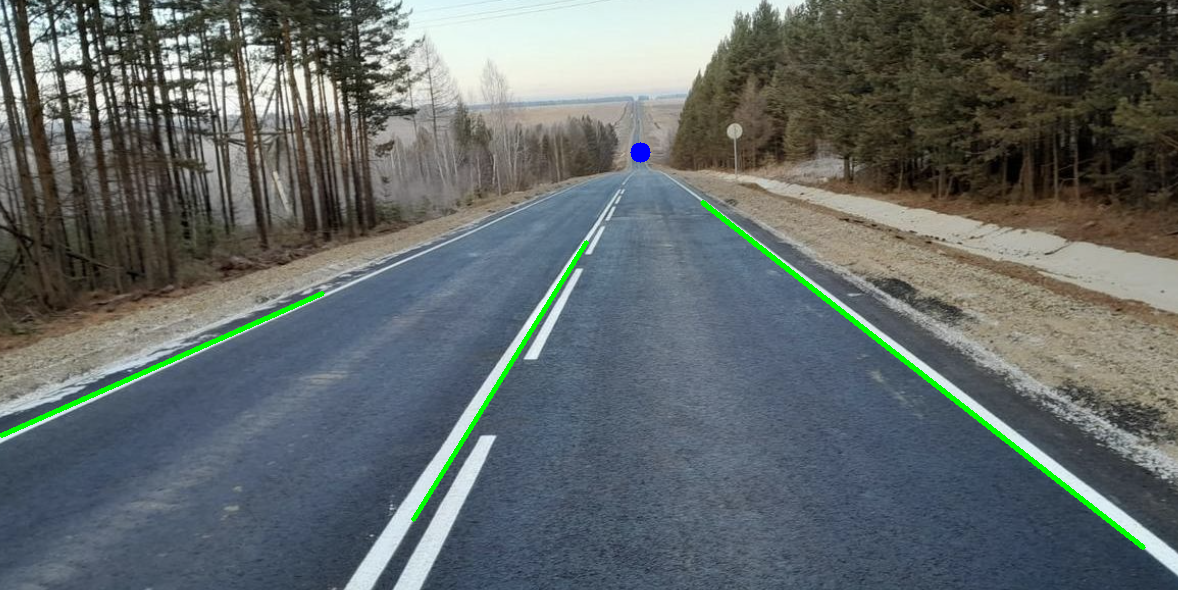

In [9]:
def find_intersection(line1, line2):
    # Распаковываем точки
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2

    # Вычисляем детерминанты
    det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if det == 0:
        return None  # Линии параллельны
    else:
        px = ((x1*y2 - y1*x2) * (x3 - x4) - (x1 - x2) * (x3*y4 - y3*x4)) / det
        py = ((x1*y2 - y1*x2) * (y3 - y4) - (y1 - y2) * (x3*y4 - y3*x4)) / det
        if 0 <= px < w and 0 <= py < h: 
            return (int(px), int(py))

# Находим все точки пересечения
intersections = []
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        intersection = find_intersection(lines[i][0], lines[j][0])
        if intersection:
            intersections.append(intersection)

# Находим центр масс для всех точек пересечения (общую точку схода)
if intersections:
    common_intersection = np.mean(intersections, axis=0, dtype=np.int32)
    cv2.circle(image, tuple(common_intersection), 10, (255, 0, 0), -1)

save_and_show_image(image, 'intersection_image.png')